In [100]:
import numpy as np
import matplotlib as mpl
import kagglehub
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")
print("Path to dataset files:", path)

100%|██████████| 2.15M/2.15M [00:00<00:00, 19.8MB/s]

Extracting model files...
Path to dataset files: /Users/jeetpmehta/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2


In [8]:
df = pd.read_csv('Loan.csv')
x = df.columns
x = ['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
#experimenting
X = df[x]
#the prediction/classification that matters
y = df['LoanApproved']
#Tells us that there are no null elements in this df
X.isna().any()

ApplicationDate               False
Age                           False
AnnualIncome                  False
CreditScore                   False
EmploymentStatus              False
EducationLevel                False
Experience                    False
LoanAmount                    False
LoanDuration                  False
MaritalStatus                 False
NumberOfDependents            False
HomeOwnershipStatus           False
MonthlyDebtPayments           False
CreditCardUtilizationRate     False
NumberOfOpenCreditLines       False
NumberOfCreditInquiries       False
DebtToIncomeRatio             False
BankruptcyHistory             False
LoanPurpose                   False
PreviousLoanDefaults          False
PaymentHistory                False
LengthOfCreditHistory         False
SavingsAccountBalance         False
CheckingAccountBalance        False
TotalAssets                   False
TotalLiabilities              False
MonthlyIncome                 False
UtilityBillsPaymentHistory  

In [16]:
df.shape
# 20000 rows, 36 columns

(20000, 36)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [19]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols

['ApplicationDate',
 'EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose']

In [ ]:
# #need to convert these classes into one hot encoding 
df = pd.get_dummies(df, columns=['LoanPurpose','EmploymentStatus', 'EducationLevel','MaritalStatus','HomeOwnershipStatus'],
                     drop_first=True)

#exclude the ApplicationDate from this; need some other preprocessing for this
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()[1:]
for cols in non_numeric_cols:
    df[f'{cols}'] = df[f'{cols}'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplicationDate                 20000 non-null  object 
 1   Age                             20000 non-null  int64  
 2   AnnualIncome                    20000 non-null  int64  
 3   CreditScore                     20000 non-null  int64  
 4   Experience                      20000 non-null  int64  
 5   LoanAmount                      20000 non-null  int64  
 6   LoanDuration                    20000 non-null  int64  
 7   NumberOfDependents              20000 non-null  int64  
 8   MonthlyDebtPayments             20000 non-null  int64  
 9   CreditCardUtilizationRate       20000 non-null  float64
 10  NumberOfOpenCreditLines         20000 non-null  int64  
 11  NumberOfCreditInquiries         20000 non-null  int64  
 12  DebtToIncomeRatio               

In [73]:
x_new = df.columns.drop('LoanApproved')
x = ['RiskScore', 'DebtToIncomeRatio', 'TotalDebtToIncomeRatio']
#X = df[x_new[1:]]
X = df[x]
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=.5, random_state=0)
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)
# model.score(X_train,y_train)


importance_df = pd.DataFrame({
        'feature': X.columns,
        'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending = False)

model.score(X_test,y_test), model.feature_importances_
# importance_df


(0.9799, array([0.91618285, 0.0419347 , 0.04188246]))

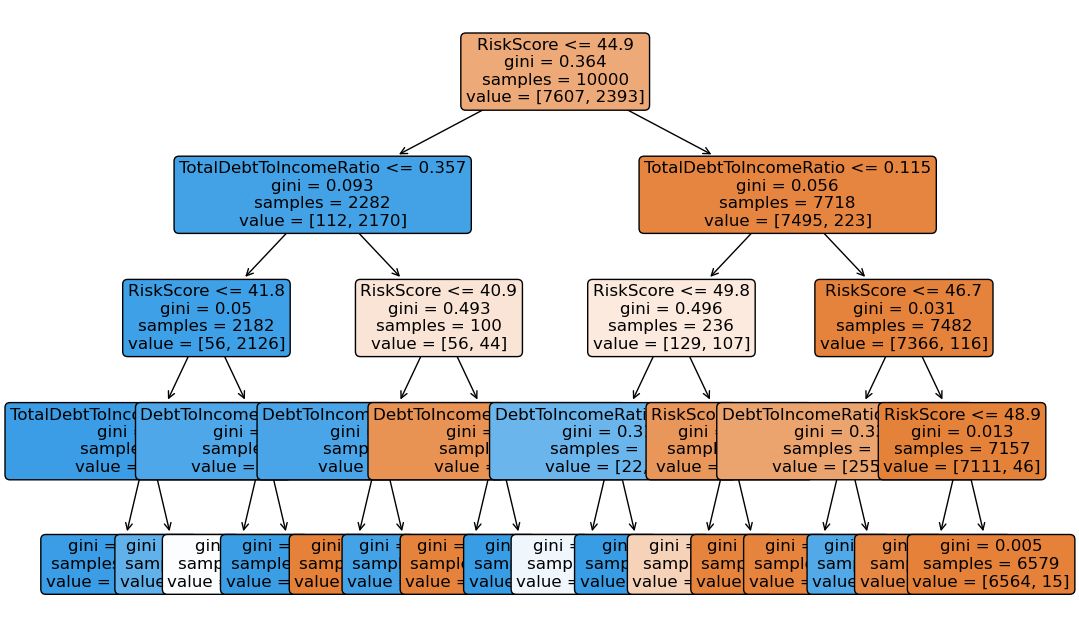

In [78]:
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=x,
          filled=True, 
          rounded=True,
          fontsize=12)
plt.show()

Only RiskScore gives 97.525% accuracy on test set

In [81]:
#checking what just RiskScore has effect on the Tree
x = ['RiskScore']
X = df[x]
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=.4, random_state=0)
modelRiskScore=DecisionTreeClassifier(max_depth=4)
modelRiskScore.fit(X_train,y_train)
modelRiskScore.score(X_test,y_test), modelRiskScore.feature_importances_



(0.97525, array([1.]))

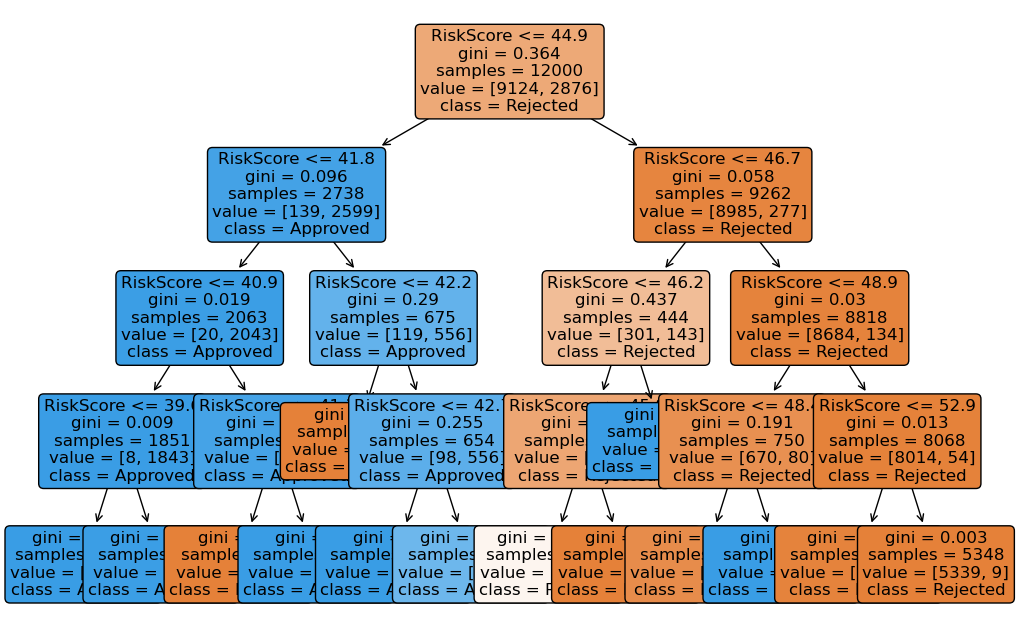

In [102]:
plt.figure(figsize=(12, 8))
plot_tree(modelRiskScore, 
          feature_names=x,
          class_names=['Rejected', 'Approved'],
          filled=True, 
          rounded=True,
          fontsize=12)
plt.show()

In [83]:
#check for correlation; shouldnt be above 0.8(it isnt)
df[['RiskScore', 'DebtToIncomeRatio', 'TotalDebtToIncomeRatio']].corr()


,RiskScore,DebtToIncomeRatio,TotalDebtToIncomeRatio
RiskScore,1.000000,0.326500,0.342643
DebtToIncomeRatio,0.326500,1.000000,-0.013076
TotalDebtToIncomeRatio,0.342643,-0.013076,1.000000


**Cross Validation Scores**


In [88]:
#Cross validation should be done now
scores = cross_val_score(model, X, y, cv=5)
scores
#suggests that the model fairs equally well in all folds

array([0.97475, 0.97475, 0.974  , 0.9765 , 0.97375])

**Confusion Matrix**

In [91]:
confusion_matrix(y_test, model.predict(X_test))
#the positive, negative is always about the prediction made and not the actual value
#       TP       FP
#array([[6027,   69],
# FN  TN[ 129, 1775]])


#false negative means the prediction was false and classifies as the negative side, so ->loan not approved


array([[6027,   69],
       [ 129, 1775]])

**Accuracy, Recall, Precision, F-1 score**

In [ ]:
##accuracy = TP+TN/All Predictions
print(accuracy_score(y_test, model.predict(X_test)))

##recall=TP/TP+FN->out of all the positive results how many could the model predict?
print(recall_score(y_test, model.predict(X_test)))

##precision=TP/TP+FP ->out of all the positive classifications, how many are accurate?
print(precision_score(y_test, model.predict(X_test)))

## F-1 score = 2*precision*recall/precision+recall
print(f1_score(y_test, model.predict(X_test)))

## decision trees have a tendency to predict the bigger/majority class cause its safer mathematically,so 
## when the dataset is actually imbalanced, more majority class than minority rows, the tree may 
## not predict as many minority class data points and thus the recall will be bad but the precision
## may be good as whenever it predicts the minority class it may be correct, the F1 score helps balance 
# this trade-off between precision and recall by combining them into a single metric, giving a more 
# realistic picture of model performance on imbalanced data.

0.97525
0.9322478991596639
0.9471718249733192


<Axes: xlabel='Importance', ylabel='feature'>

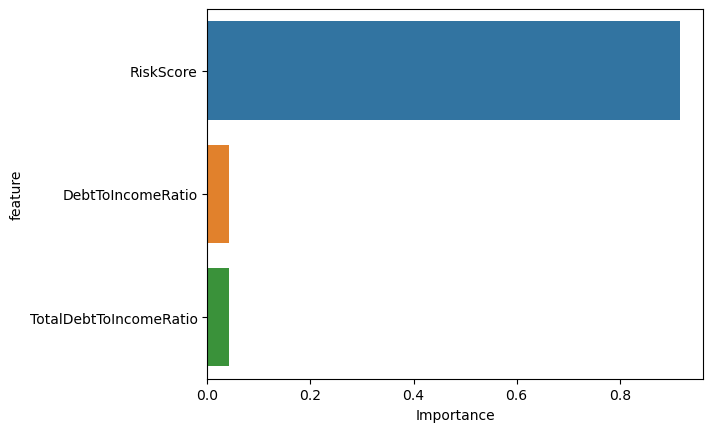

In [101]:
sns.barplot(data=importance_df.head(10), x='Importance', y='feature')


**CONCLUSION❗️❗️❗️**


Conclusion (Phase 1)
This project demonstrates the effectiveness of decision tree models in predicting loan approval outcomes using structured financial data. Through careful feature selection, visualization, and evaluation using metrics like precision, recall, and F1-score, it became clear that RiskScore plays a dominant role in driving approval decisions. While the current model achieves high accuracy and interpretability, it also highlights how class imbalance can skew performance, especially in recall. This marks the completion of Phase 1, where a clean, interpretable baseline has been established. In future phases, I will expand this project by comparing the decision tree's performance with other machine learning models (Phase 2), and eventually experiment with deep learning architectures to capture more complex, non-linear relationships (Phase 3). This stepwise approach will help uncover the best-performing and most reliable system for loan approval prediction.